In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from scipy import stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nutrition/nutrition.csv


In [2]:
df_food = pd.read_csv('/kaggle/input/nutrition/nutrition.csv')
df_food.head()

,FDC_ID,Item,Category,Calories,Protein,Carbohydrate,Total fat,Cholesterol,Fiber,Water,Alcohol,Vitamin C
0,167512,"Pillsbury Golden Layer Buttermilk Biscuits, Ar...",Baked Products,307.0 kcal,5.88 g,41.18 g,13.24 g,0.0 mg,1.2 g,35.5 g,NaN,NaN
1,167513,"Pillsbury, Cinnamon Rolls with Icing, refriger...",Baked Products,330.0 kcal,4.34 g,53.42 g,11.27 g,0.0 mg,1.4 g,27.86 g,NaN,0.1 mg
2,167514,"Kraft Foods, Shake N Bake Original Recipe, Coa...",Baked Products,377.0 kcal,6.1 g,79.8 g,3.7 g,NaN,NaN,3.2 g,NaN,NaN
3,167515,"George Weston Bakeries, Thomas English Muffins",Baked Products,232.0 kcal,8.0 g,46.0 g,1.8 g,NaN,NaN,42.6 g,NaN,NaN
4,167516,"Waffles, buttermilk, frozen, ready-to-heat",Baked Products,273.0 kcal,6.58 g,41.05 g,9.22 g,15.0 mg,2.2 g,40.34 g,0.0 g,0.0 mg


# Which Fruit has the highest vitamin C content?

In [3]:
df_food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7793 entries, 0 to 7792
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   FDC_ID        7793 non-null   int64 
 1   Item          7793 non-null   object
 2   Category      7793 non-null   object
 3   Calories      7793 non-null   object
 4   Protein       7793 non-null   object
 5   Carbohydrate  7793 non-null   object
 6   Total fat     7793 non-null   object
 7   Cholesterol   7394 non-null   object
 8   Fiber         7231 non-null   object
 9   Water         7793 non-null   object
 10  Alcohol       5399 non-null   object
 11  Vitamin C     7332 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.7+ KB


**Count the missing values (NAN) in each column of the dataframe df_food**

In [4]:
df_food.isna().sum()

FDC_ID             0
Item               0
Category           0
Calories           0
Protein            0
Carbohydrate       0
Total fat          0
Cholesterol      399
Fiber            562
Water              0
Alcohol         2394
Vitamin C        461
dtype: int64

**Duplicate the dataset**

In [5]:
df_food_copy = df_food.copy()

**Cleaning the string values from the columns of vitamin C in the dataset**

In [6]:
df_food_copy['Vitamin C'] = df_food_copy['Vitamin C'].str.replace("mg"," ")
df_food_copy['Vitamin C'].head()

0      NaN
1    0.1  
2      NaN
3      NaN
4    0.0  
Name: Vitamin C, dtype: object

In [7]:
# convert the "Vitamin C" column of the dataframe df_food_copy to float datatype
df_food_copy['Vitamin C'] = df_food_copy['Vitamin C'].astype(float)
df_food_copy['Vitamin C']

0       NaN
1       0.1
2       NaN
3       NaN
4       0.0
       ... 
7788    0.0
7789    0.0
7790    0.0
7791    0.0
7792    0.0
Name: Vitamin C, Length: 7793, dtype: float64

In [8]:
# Group the dataframe df_food_copy by the Item column and calculate the sum of Vitamin C for each group
df_Total_C = df_food_copy.groupby("Item")['Vitamin C'].sum().reset_index()
df_Total_C.head(20)

,Item,Vitamin C
0,"APPLEBEE'S, 9 oz house sirloin steak",0.0
1,"APPLEBEE'S, Double Crunch Shrimp",0.0
2,"APPLEBEE'S, KRAFT, Macaroni & Cheese, from kid...",0.0
3,"APPLEBEE'S, chicken tenders platter",0.0
4,"APPLEBEE'S, chicken tenders, from kids' menu",0.0
5,"APPLEBEE'S, chili",1.1
6,"APPLEBEE'S, coleslaw",13.7
7,"APPLEBEE'S, crunchy onion rings",0.0
8,"APPLEBEE'S, fish, hand battered",0.0
9,"APPLEBEE'S, french fries",0.7


In [9]:
# sorting the dataframe df_Total_C by the Vitamin C column in descending order
high_C = df_Total_C.sort_values('Vitamin C', ascending=False)
high_C.head()

,Item,Vitamin C
205,"Babyfood, GERBER, 2nd Foods, apple, carrot and...",2732.0
1792,"Beverages, fruit-flavored drink, powder, with ...",2400.0
1666,"Beverages, Orange-flavor drink, breakfast type...",2400.0
5464,"Peppers, sweet, red, freeze-dried",1900.0
14,"Acerola, (west indian cherry), raw",1677.6


In [10]:
fruits = high_C['Item'].iloc[0]
print(fruits)
high_vitamin_c_value = high_C['Vitamin C'].iloc[0]
print(high_vitamin_c_value)

Babyfood, GERBER, 2nd Foods, apple, carrot and squash, organic
2732.0


# Highest Vitamin C fruits and its value
* Fruits :- Babyfood, GERBER, 2nd Foods, apple, carrot and squash, organic
* Vitamin C :- 2732.0

# What are some other sources of Vitamin C ?

In [11]:
source = []

# Filtering those rows in the dataframe df_Total_C whose 'Vitamin C' count is not equal to 0.
source = df_Total_C.loc[df_Total_C['Vitamin C'] != 0]

In [12]:
high_C = source.sort_values('Vitamin C', ascending = False)
high_C.head()

,Item,Vitamin C
205,"Babyfood, GERBER, 2nd Foods, apple, carrot and...",2732.0
1666,"Beverages, Orange-flavor drink, breakfast type...",2400.0
1792,"Beverages, fruit-flavored drink, powder, with ...",2400.0
5464,"Peppers, sweet, red, freeze-dried",1900.0
14,"Acerola, (west indian cherry), raw",1677.6


# Describe the relationship between the calories and water content of a food item.

In [13]:
df_food_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7793 entries, 0 to 7792
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   FDC_ID        7793 non-null   int64  
 1   Item          7793 non-null   object 
 2   Category      7793 non-null   object 
 3   Calories      7793 non-null   object 
 4   Protein       7793 non-null   object 
 5   Carbohydrate  7793 non-null   object 
 6   Total fat     7793 non-null   object 
 7   Cholesterol   7394 non-null   object 
 8   Fiber         7231 non-null   object 
 9   Water         7793 non-null   object 
 10  Alcohol       5399 non-null   object 
 11  Vitamin C     7332 non-null   float64
dtypes: float64(1), int64(1), object(10)
memory usage: 730.7+ KB


In [14]:
df_food_copy.head()

,FDC_ID,Item,Category,Calories,Protein,Carbohydrate,Total fat,Cholesterol,Fiber,Water,Alcohol,Vitamin C
0,167512,"Pillsbury Golden Layer Buttermilk Biscuits, Ar...",Baked Products,307.0 kcal,5.88 g,41.18 g,13.24 g,0.0 mg,1.2 g,35.5 g,NaN,NaN
1,167513,"Pillsbury, Cinnamon Rolls with Icing, refriger...",Baked Products,330.0 kcal,4.34 g,53.42 g,11.27 g,0.0 mg,1.4 g,27.86 g,NaN,0.1
2,167514,"Kraft Foods, Shake N Bake Original Recipe, Coa...",Baked Products,377.0 kcal,6.1 g,79.8 g,3.7 g,NaN,NaN,3.2 g,NaN,NaN
3,167515,"George Weston Bakeries, Thomas English Muffins",Baked Products,232.0 kcal,8.0 g,46.0 g,1.8 g,NaN,NaN,42.6 g,NaN,NaN
4,167516,"Waffles, buttermilk, frozen, ready-to-heat",Baked Products,273.0 kcal,6.58 g,41.05 g,9.22 g,15.0 mg,2.2 g,40.34 g,0.0 g,0.0


In [15]:
df_food_copy[['Calories','Water']].describe()

,Calories,Water
count,7793,7793
unique,667,4163
top,884.0 kcal,0.0 g
freq,77,92


In [16]:
# Removing the string part 'kcal' from the Calories column
df_food_copy['Calories'] = df_food_copy['Calories'].str.replace('kcal',' ')

In [17]:
df_food_copy.head()

,FDC_ID,Item,Category,Calories,Protein,Carbohydrate,Total fat,Cholesterol,Fiber,Water,Alcohol,Vitamin C
0,167512,"Pillsbury Golden Layer Buttermilk Biscuits, Ar...",Baked Products,307.0,5.88 g,41.18 g,13.24 g,0.0 mg,1.2 g,35.5 g,NaN,NaN
1,167513,"Pillsbury, Cinnamon Rolls with Icing, refriger...",Baked Products,330.0,4.34 g,53.42 g,11.27 g,0.0 mg,1.4 g,27.86 g,NaN,0.1
2,167514,"Kraft Foods, Shake N Bake Original Recipe, Coa...",Baked Products,377.0,6.1 g,79.8 g,3.7 g,NaN,NaN,3.2 g,NaN,NaN
3,167515,"George Weston Bakeries, Thomas English Muffins",Baked Products,232.0,8.0 g,46.0 g,1.8 g,NaN,NaN,42.6 g,NaN,NaN
4,167516,"Waffles, buttermilk, frozen, ready-to-heat",Baked Products,273.0,6.58 g,41.05 g,9.22 g,15.0 mg,2.2 g,40.34 g,0.0 g,0.0


In [18]:
# Removing the string part 'g' from the column Water 
df_food_copy['Water'] = df_food_copy['Water'].str.replace('g',' ')
df_food_copy.head()

,FDC_ID,Item,Category,Calories,Protein,Carbohydrate,Total fat,Cholesterol,Fiber,Water,Alcohol,Vitamin C
0,167512,"Pillsbury Golden Layer Buttermilk Biscuits, Ar...",Baked Products,307.0,5.88 g,41.18 g,13.24 g,0.0 mg,1.2 g,35.5,NaN,NaN
1,167513,"Pillsbury, Cinnamon Rolls with Icing, refriger...",Baked Products,330.0,4.34 g,53.42 g,11.27 g,0.0 mg,1.4 g,27.86,NaN,0.1
2,167514,"Kraft Foods, Shake N Bake Original Recipe, Coa...",Baked Products,377.0,6.1 g,79.8 g,3.7 g,NaN,NaN,3.2,NaN,NaN
3,167515,"George Weston Bakeries, Thomas English Muffins",Baked Products,232.0,8.0 g,46.0 g,1.8 g,NaN,NaN,42.6,NaN,NaN
4,167516,"Waffles, buttermilk, frozen, ready-to-heat",Baked Products,273.0,6.58 g,41.05 g,9.22 g,15.0 mg,2.2 g,40.34,0.0 g,0.0


In [19]:
df_food_copy[['Calories','Water']].head()

,Calories,Water
0,307.0,35.5
1,330.0,27.86
2,377.0,3.2
3,232.0,42.6
4,273.0,40.34


In [20]:
# Converting the column Calories into a float datatype
df_food_copy['Calories'] = df_food_copy['Calories'].astype(float)

In [21]:
# Converting the column 'Water' into a float datatype
df_food_copy['Water'] = df_food_copy['Water'].astype(float)

In [22]:
df_food_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7793 entries, 0 to 7792
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   FDC_ID        7793 non-null   int64  
 1   Item          7793 non-null   object 
 2   Category      7793 non-null   object 
 3   Calories      7793 non-null   float64
 4   Protein       7793 non-null   object 
 5   Carbohydrate  7793 non-null   object 
 6   Total fat     7793 non-null   object 
 7   Cholesterol   7394 non-null   object 
 8   Fiber         7231 non-null   object 
 9   Water         7793 non-null   float64
 10  Alcohol       5399 non-null   object 
 11  Vitamin C     7332 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 730.7+ KB


In [23]:
# Selecting the column 'Calories' and 'Water'
calories_column = df_food_copy['Calories']
water_column = df_food_copy['Water']

In [24]:
# Calculating the pearson correlation and p-value
correlation_coefficient, p_value = stats.pearsonr(calories_column,water_column)

Pearson Correlation Coefficient (pearsonr):
Imagine you have two friends, and you want to see if there's a connection between the amount of time they spend playing video games and their scores in school. The Pearson correlation coefficient is like a special number that tells you how much their video game time and school scores go together.

If the number is close to 1, it means when one friend spends more time playing video games, the other friend's school score tends to be higher too (they both go up together).
If the number is close to -1, it means when one friend spends more time playing video games, the other friend's school score tends to be lower (one goes up, the other goes down).
If the number is close to 0, it means there's not much of a connection – video game time doesn't seem to affect school scores much.
So, the Pearson correlation coefficient helps you understand if two things are related and how much they go together.

P-value:
Now, let's talk about the p-value. Imagine you and your friend have two special dice. One of them might be normal, and the other might be a magic die that always rolls a 6. You want to find out if your friend's die is magic or not.

The p-value is like a measure of how surprised you would be if your friend's die is normal (not magic). If the p-value is very small, you'd be really surprised – it's like saying, "Wow, it's unlikely this die is normal!"
If the p-value is big, it means you wouldn't be that surprised if the die is normal – it's like saying, "Eh, this could happen."
So, the p-value helps you decide if something special is going on or if things are probably normal.

In summary:

Pearson correlation coefficient tells you how two things are connected (like video game time and school scores).
P-value helps you decide if something special is happening or if things are probably normal (like a magic die or a regular die).

In [25]:
print(correlation_coefficient)
print(p_value)

-0.8954571656706273
0.0


<Axes: >

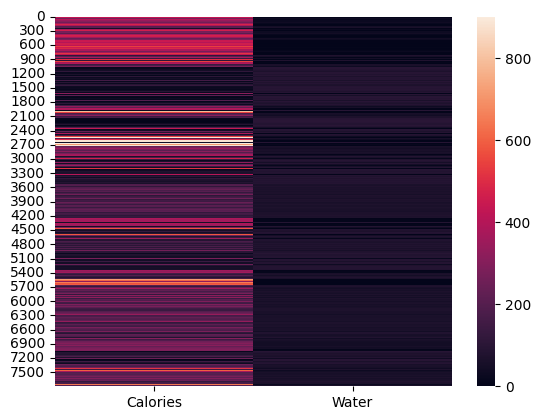

In [26]:
# Round the 'Calories' and 'Water' into its nearest whole number
# Create a heatmap using the rounded data
# This heatmap will display the relationship between the 'Calories' and 'Water' 
sns.heatmap(round(df_food_copy[['Calories','Water']],0))

Text(0.5, 1.0, 'Relationship between "Calories" and "Water" ')

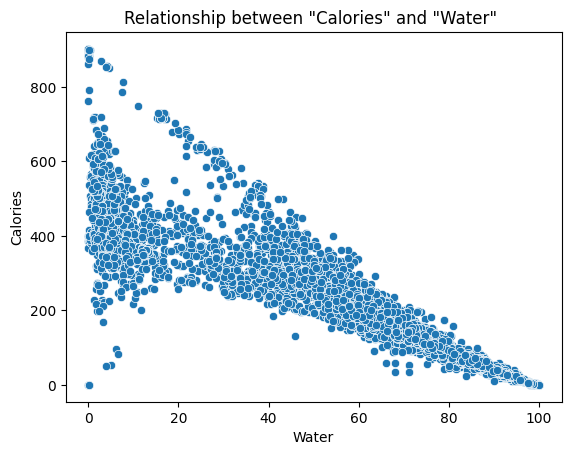

<Figure size 700x800 with 0 Axes>

In [27]:
# Scatter Plot to visualize the relationship between the 'Calories' and 'Water' column
ax = sns.scatterplot(x='Water',y='Calories',data=df_food_copy)
plt.figure(figsize=(7,8))
ax.set_title('Relationship between "Calories" and "Water" ')



In [28]:
x1 = water_column
y = calories_column

In [29]:
x = sm.add_constant(x1)

In [30]:
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Calories   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                 3.153e+04
Date:                Sat, 02 Mar 2024   Prob (F-statistic):               0.00
Time:                        10:15:22   Log-Likelihood:                -44716.
No. Observations:                7793   AIC:                         8.944e+04
Df Residuals:                    7791   BIC:                         8.945e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        507.3537      1.827    277.657      0.000     503.772     510.936
Water         -5.1239      0.029   -177.557      0.000      -5.180      -5.067
==============================================================================
Omnibus:                     3488.495   Durbin-Watson:                   0.669
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            43449.626
Skew:                           1.810   Prob(JB):                         0.00
Kurtosis:                      13.986   Cond. No.                         136.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

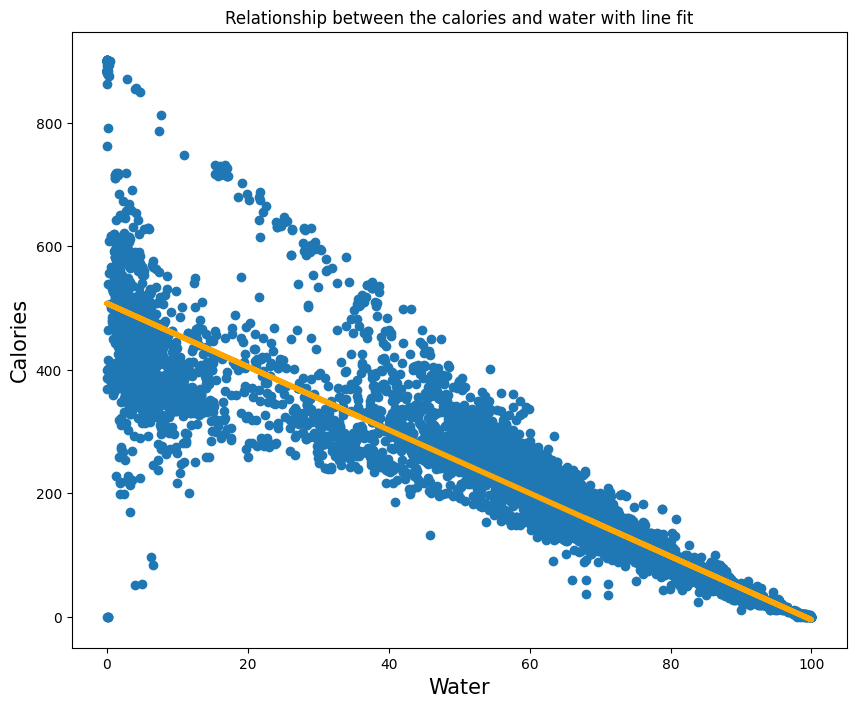

In [31]:
# Set the default figure size for the matplotlib
plt.rcParams["figure.figsize"] = (10,8)

# Scatter plot the data points
plt.scatter(x1,y)

# Calculate the predicted values using the linear regression model
yhat = 507.3537 + (-5.1239*x1)

# Plot the regression line
fig = plt.plot(x1,yhat,lw=4,c='orange',label='regression line')

# Set labels and titles
plt.xlabel('Water',fontsize=15)
plt.ylabel('Calories',fontsize=15)
plt.title("Relationship between the calories and water with line fit")

# Display the plot
plt.show()

In [32]:
yhat

0       325.455250
1       364.601846
2       490.957220
3       289.075560
4       300.655574
           ...    
7788    154.778141
7789    126.238018
7790    167.741608
7791    118.757124
7792    157.852481
Name: Water, Length: 7793, dtype: float64

In [33]:
# using numpy ployfit to perform linear regression
water, constant = np.polyfit(water_column,calories_column,1)

# Printing the linear regression equation
print("Predicted Calories = {} * water + {}".format(water,constant))

Predicted Calories = -5.123912928014046 * water + 507.3537182061312


In [34]:
# Randomly select a singe row from the dataframe df_food_copy
Item_sample = df_food_copy.sample()
Item_sample

,FDC_ID,Item,Category,Calories,Protein,Carbohydrate,Total fat,Cholesterol,Fiber,Water,Alcohol,Vitamin C
4724,175255,"Mung beans, mature seeds, cooked, boiled, with...",Legumes and Legume Products,105.0,7.02 g,19.15 g,0.38 g,0.0 mg,7.6 g,72.66,NaN,1.0


In [35]:
# Extracting the water column from the randomly selected row
Water_sample = Item_sample['Water'].values
Water_sample


array([72.66])

In [36]:
# Calculating the predicted calories using the water from the sample
calories_pr = (507.3537182061312 + (-5.123912928014046 * Water_sample))
print("The Predicted Calories is {}".format(calories_pr))

The Predicted Calories is [135.05020486]


# What are the possible drawbacks of a zero-carb diet

In [37]:
# Create a dataframe with hypothetical drawbacks of a zero-carb diet
drawbacks_data = {
    'Drawback': [
        'Nutrient Deficiency',
        'Energy Levels',
        'Digestive Issues',
        'Ketosis Risks',
        'Muscle Loss',
        'Sustainability Challenges'
    ],
    'Description': [
        'Lack of essential nutrients found in carbohydrates may lead to deficiencies.',
        'Carbohydrates are a primary source of energy; a zero-carb diet may affect energy levels.',
        'Low fiber intake can cause digestive problems and constipation.',
        'Entering a state of ketosis may have potential risks and side effects.',
        'Inadequate protein intake may result in muscle loss over time.',
        'Strict adherence to a zero-carb diet may be challenging and unsustainable.'
    ]
}
zero_carb_diet = pd.DataFrame(drawbacks_data)
zero_carb_diet

,Drawback,Description
0,Nutrient Deficiency,Lack of essential nutrients found in carbohydr...
1,Energy Levels,Carbohydrates are a primary source of energy; ...
2,Digestive Issues,Low fiber intake can cause digestive problems ...
3,Ketosis Risks,Entering a state of ketosis may have potential...
4,Muscle Loss,Inadequate protein intake may result in muscle...
5,Sustainability Challenges,Strict adherence to a zero-carb diet may be ch...


In [38]:
# Create a dataframe with hypothetical drawbacks of a very high-protein diet
drawbacks_data = {
    'Drawback': [
        'Kidney Strain',
        'Digestive Issues',
        'Nutrient Imbalance',
        'Potential Weight Gain',
        'Dehydration',
        'Heart Health Risks'
    ],
    'Description': [
        'Excessive protein may put strain on the kidneys, especially in individuals with pre-existing kidney conditions.',
        'Very high protein intake may lead to digestive problems, including constipation.',
        'Overemphasis on protein may result in an imbalance with other essential nutrients.',
        'Consuming excess protein without sufficient exercise may contribute to weight gain.',
        'Protein metabolism can increase water loss, potentially leading to dehydration.',
        'Certain high-protein foods may be associated with saturated fats, impacting heart health.'
    ]
}
high_protein_diet = pd.DataFrame(drawbacks_data)
high_protein_diet

,Drawback,Description
0,Kidney Strain,Excessive protein may put strain on the kidney...
1,Digestive Issues,Very high protein intake may lead to digestive...
2,Nutrient Imbalance,Overemphasis on protein may result in an imbal...
3,Potential Weight Gain,Consuming excess protein without sufficient ex...
4,Dehydration,"Protein metabolism can increase water loss, po..."
5,Heart Health Risks,Certain high-protein foods may be associated w...


**According to the Cleveland Clinic website, a gram of fat has around 9 kilocalories, and a gram of protein and a gram of carbohydrate contain 4 kilocalories each. Fit a linear model to test whether these estimates agree with the data.**

In [39]:
# List of columns to apply the replacement
columns_to_replace = ["Total fat","Carbohydrate","Protein"]
df_food_copy.head()

,FDC_ID,Item,Category,Calories,Protein,Carbohydrate,Total fat,Cholesterol,Fiber,Water,Alcohol,Vitamin C
0,167512,"Pillsbury Golden Layer Buttermilk Biscuits, Ar...",Baked Products,307.0,5.88 g,41.18 g,13.24 g,0.0 mg,1.2 g,35.50,NaN,NaN
1,167513,"Pillsbury, Cinnamon Rolls with Icing, refriger...",Baked Products,330.0,4.34 g,53.42 g,11.27 g,0.0 mg,1.4 g,27.86,NaN,0.1
2,167514,"Kraft Foods, Shake N Bake Original Recipe, Coa...",Baked Products,377.0,6.1 g,79.8 g,3.7 g,NaN,NaN,3.20,NaN,NaN
3,167515,"George Weston Bakeries, Thomas English Muffins",Baked Products,232.0,8.0 g,46.0 g,1.8 g,NaN,NaN,42.60,NaN,NaN
4,167516,"Waffles, buttermilk, frozen, ready-to-heat",Baked Products,273.0,6.58 g,41.05 g,9.22 g,15.0 mg,2.2 g,40.34,0.0 g,0.0


In [40]:
# using apply and str.replace to replace 'g' with ''
df_food_copy[columns_to_replace] = df_food_copy[columns_to_replace].apply(lambda x : x.str.replace('g',''))
df_food_copy.head()

,FDC_ID,Item,Category,Calories,Protein,Carbohydrate,Total fat,Cholesterol,Fiber,Water,Alcohol,Vitamin C
0,167512,"Pillsbury Golden Layer Buttermilk Biscuits, Ar...",Baked Products,307.0,5.88,41.18,13.24,0.0 mg,1.2 g,35.50,NaN,NaN
1,167513,"Pillsbury, Cinnamon Rolls with Icing, refriger...",Baked Products,330.0,4.34,53.42,11.27,0.0 mg,1.4 g,27.86,NaN,0.1
2,167514,"Kraft Foods, Shake N Bake Original Recipe, Coa...",Baked Products,377.0,6.1,79.8,3.7,NaN,NaN,3.20,NaN,NaN
3,167515,"George Weston Bakeries, Thomas English Muffins",Baked Products,232.0,8.0,46.0,1.8,NaN,NaN,42.60,NaN,NaN
4,167516,"Waffles, buttermilk, frozen, ready-to-heat",Baked Products,273.0,6.58,41.05,9.22,15.0 mg,2.2 g,40.34,0.0 g,0.0


In [41]:
# The following command extracts a subset of original Dataframe df_food_copy
# It Selects column through 3 to 6 and stores to value to a variable nutrition_data_filled
nutrition_data_filled = df_food_copy.iloc[:,3:7].values
nutrition_data_filled

array([[307.0, '5.88 ', '41.18 ', '13.24 '],
       [330.0, '4.34 ', '53.42 ', '11.27 '],
       [377.0, '6.1 ', '79.8 ', '3.7 '],
       ...,
       [146.0, '30.19 ', '0.0 ', '1.9 '],
       [109.0, '20.6 ', '0.0 ', '2.31 '],
       [143.0, '27.1 ', '0.0 ', '3.03 ']], dtype=object)

In [43]:
nutrition_data_filled

array([[307.0, '5.88 ', '41.18 ', '13.24 '],
       [330.0, '4.34 ', '53.42 ', '11.27 '],
       [377.0, '6.1 ', '79.8 ', '3.7 '],
       ...,
       [146.0, '30.19 ', '0.0 ', '1.9 '],
       [109.0, '20.6 ', '0.0 ', '2.31 '],
       [143.0, '27.1 ', '0.0 ', '3.03 ']], dtype=object)